In [2]:
import numpy as np
x = np.arange(25)

In [3]:
x

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [4]:
x2 = np.reshape(x, (5,5))

In [5]:
x2

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [6]:
np.roll(x2, 1)

array([[24,  0,  1,  2,  3],
       [ 4,  5,  6,  7,  8],
       [ 9, 10, 11, 12, 13],
       [14, 15, 16, 17, 18],
       [19, 20, 21, 22, 23]])

In [7]:
np.roll(x2, 1, axis=1)

array([[ 4,  0,  1,  2,  3],
       [ 9,  5,  6,  7,  8],
       [14, 10, 11, 12, 13],
       [19, 15, 16, 17, 18],
       [24, 20, 21, 22, 23]])

In [ ]:
def life_step_1(X):
    """Game of life step using generator expressions"""
    nbrs_count = sum(np.roll(np.roll(X, i, 0), j, 1)
                     for i in (-1, 0, 1) for j in (-1, 0, 1)
                     if (i != 0 or j != 0))
    return (nbrs_count == 3) | (X & (nbrs_count == 2))


In [8]:
from scipy.signal import convolve2d

In [ ]:
def life_step_2(X):
    """Game of life step using scipy tools"""
    from scipy.signal import convolve2d
    nbrs_count = convolve2d(X, np.ones((3, 3)), mode='same', boundary='wrap') - X
    return (nbrs_count == 3) | (X & (nbrs_count == 2))

In [10]:
import numpy as np
from PIL import Image
 
def imconv(image_array,suanzi):
    '''计算卷积
        参数
        image_array 原灰度图像矩阵
        suanzi      算子
        返回
        原图像与算子卷积后的结果矩阵
    '''
    image = image_array.copy()     # 原图像矩阵的深拷贝
 
    dim1,dim2 = image.shape
 
    # 对每个元素与算子进行乘积再求和(忽略最外圈边框像素)
    for i in range(1,dim1-1):
        for j in range(1,dim2-1):
            image[i,j] = (image_array[(i-1):(i+2),(j-1):(j+2)]*suanzi).sum()
 
    # 由于卷积后灰度值不一定在0-255之间，统一化成0-255
    image = image*(255.0/image.max())
 
    # 返回结果矩阵
    return image

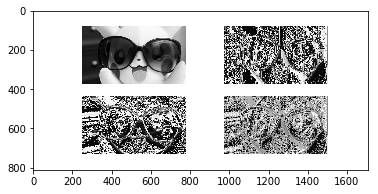

In [14]:
import numpy as np
import matplotlib.pyplot as plt
 
# x方向的Prewitt算子
suanzi_x = np.array([[-1, 0, 1],
                    [ -1, 0, 1],
                    [ -1, 0, 1]])
 
# y方向的Prewitt算子
suanzi_y = np.array([[-1,-1,-1],
                     [ 0, 0, 0],
                     [ 1, 1, 1]])
 
# 打开图像并转化成灰度图像
image = Image.open("pika.png").convert("L")
 
# 转化成图像矩阵
image_array = np.array(image)
 
# 得到x方向矩阵
image_x = imconv(image_array,suanzi_x)
 
# 得到y方向矩阵
image_y = imconv(image_array,suanzi_y)
 
# 得到梯度矩阵
image_xy = np.sqrt(image_x**2+image_y**2)
# 梯度矩阵统一到0-255
image_xy = (255.0/image_xy.max())*image_xy
 
# 绘出图像
plt.subplot(1,1,1)
plt.imshow(image_array,cmap=plt.get_cmap('gray'))
plt.show()
# plt.axis("off")
# plt.subplot(2,2,2)
# plt.imshow(image_x,cmap=plt.get_cmap('gray'))
# plt.axis("off")
# plt.subplot(2,2,3)
# plt.imshow(image_y,cmap=plt.get_cmap('gray'))
# plt.axis("off")
# plt.subplot(2,2,4)
# plt.imshow(image_xy,cmap=plt.get_cmap('gray'))
# plt.axis("off")
# plt.show()